This Assignment requires you to write a Python program that loads the Iris dataset (see Chapter 2) and applies the EM algorithm with a Gaussian mixture model. You are not allowed to use any Python library for the EM algorithm itself, but you are allowed to use other helper functions. You might compare the results of your program with sklearn models, but the whole exercise is to write the algorithm yourself.

Write a program to implement EM algorithm as shown in Fig 8.5 with a Gaussian mixture model on the Iris dataset for k=3.
Plot the Sepal data points with a color coding based on the obtained clusters. 
More specifically, plot the data points with color where the RGB colour values correspond to the probability estimates of a data point belonging to each class.
What is the prediction accuracy with different numbers of assumed classes for k=2,3, and 4.

Hint: You can use numpy.linalg.pinv to find the inverse of a matrix. Also, numpy.copy  can be used to temporary save a vector.

       Please make sure to start this assignment early and ask in class if things are not clear. Also, I will not answer questions on Fridays, so please make sure you direct all your questions before this deadline.  

In [223]:

def EM(k,X,y):
    eps=1e-8
    means={}
    cov={}
    fi=[]
    #to initialize the means, covariance and fi with the first data inputs
    for i in range(k):
        means[i]=X[i]
        cov[i]=[0.5,0.5,0.5,0.5]
        fi.append(1/k)   

    P=[]
    W=[]

    Total_P={}
    ij=0
    colors=["r","b","g","y"]
    while ij <1000:
        ij+=1
        P=[]
        W=[]

        previous_means=means

        #to calculate the multivariate probabilities
        for group in range(k):
            P.append(multivariate_normal.pdf(X,mean=means[group], cov=cov[group], allow_singular=True))
        P=np.array(P)

        #to caluclate the probability weights, and recalculate means and covariance
        for group in range(k):
            W.append((P[group]*fi[group])/np.sum([P[group]*fi[group] for group in range(k)], axis=0)+eps)
            means[group] = np.sum(W[group].reshape(len(X),1) * X, axis=0) / (np.sum(W[group]+eps))
            cov[group] = np.dot((W[group].reshape(len(X),1) * (X - means[group])).T, (X - means[group])) / (np.sum(W[group])+eps)

            fi[group]=np.mean(W[group])
    W=np.array(W)
    W=W.T

    #to gather data of the same class together
    classes={0:[],1:[],2:[],3:[]}
    prediction=[]
    for i  in range(len(X)):
        classes[np.argmax(W[i])].append(X[i])
        prediction.append(np.argmax(W[i], axis=0))
    print(('predictions',prediction))  
    print('true labels',y)
    accuracy=np.mean(prediction==y)       

    #to plot out the scatter
    for i in range(len(X)):
        plt.scatter(X[i][0],X[i][1],c=colors[prediction[i]])
    plt.xlabel('sepal length')
    plt.ylabel('sepal breadth')
    return plt.show

    
    


('predictions', [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
true labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


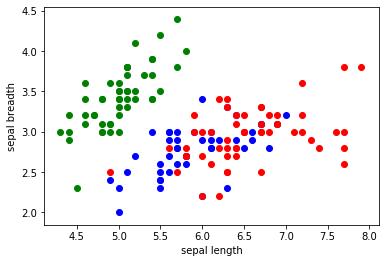

In [217]:
from sklearn import datasets
mydata=datasets.load_iris()
X=mydata.data
y=mydata.target

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

three_clusters=EM(k=3, X=X, y=y )
#accuracy is wrong because the program inverted the classes


('predictions', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
true labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


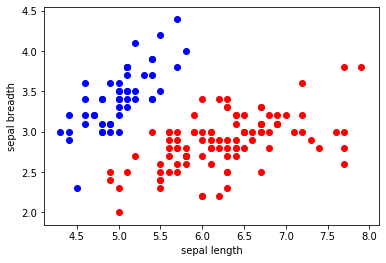

In [218]:

two_clusters=EM(k=2, X=X, y=y )

('predictions', [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0])
true labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


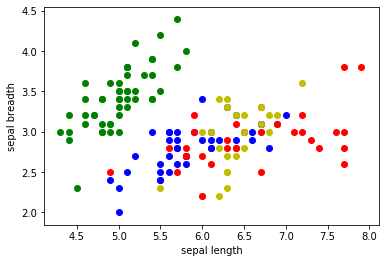

In [224]:
four_clusters=EM(k=4, X=X, y=y )